<table align="left">
  <td>
    <a href="https://colab.research.google.com/drive/1_gpTSHsTcB6tFkiQhbKgzq2IilEYGEKQ" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>


---

# **Licencia**

**Autor**: Juan Francisco Puentes Calvo

**Licencia**: GPL v3 (https://www.gnu.org/licenses/gpl-3.0.html)


# **Reconocimientos**

* Ninguno, por ahora.

---

# Seguimiento de objetos


Mira esto para completar: https://www.youtube.com/watch?v=GgGro5IV-cs

Aquí (https://github.com/akanametov/yolov8-face) puedes descargar otros modelos para detectar otras cosas (caras, vehículos en un parking, drones, ..)


In [ ]:
!pip install -q ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.5/865.5 kB 15.6 MB/s eta 0:00:00


In [ ]:
!pip install -q ipycanvas==0.11


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.8/255.8 kB 5.4 MB/s eta 0:00:00


In [ ]:
import cv2
import numpy as np
import PIL

from google.colab.patches import cv2_imshow

from ultralytics import YOLO

import matplotlib.pyplot as plt

from IPython.display import display, HTML

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
model = YOLO('yolov8n.pt')
#model = YOLO('yolov8x.pt')


100%|██████████| 6.25M/6.25M [00:00<00:00, 86.6MB/s]


In [ ]:
filename = "https://videos.pexels.com/video-files/854100/854100-hd_1920_1080_25fps.mp4";

def resize_frame(img, custom_width=600, onlydims=False):
    height, width, _ = img.shape
    desired_width = custom_width;
    width_percent = (custom_width / float(width));
    desired_height = int((float(height) * float(width_percent)));
    if not onlydims: return cv2.resize(img, (desired_width, desired_height));
    else:            return (desired_width, desired_height);

cap = cv2.VideoCapture(filename)

if cap.isOpened():
    ret, frame = cap.read()
    rescaled_frame = resize_frame(frame)
    (h, w) = rescaled_frame.shape[:2]
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    writer = cv2.VideoWriter('video_input.mp4',fourcc, 15.0,(w, h), True)
    while ret:
          rescaled_frame = resize_frame(frame)
          writer.write(rescaled_frame)
          ret, frame = cap.read()
    writer.release()
    filename='video_input.mp4'
    cap.release()
else:
    print("Camera is not opened")


In [ ]:
cap = cv2.VideoCapture(filename);

fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

tframes=0;
ok, _ = cap.read()
while ok:
      tframes+=1;
      ok, _ = cap.read()

cap.release()

print(f"El vídeo tiene {tframes} frames en total; a {fps} frames por segundo, eso es {tframes/fps} segundos");

El vídeo tiene 393 frames en total; a 15 frames por segundo, eso es 26.2 segundos



0: 384x640 3 persons, 2 cars, 1 truck, 133.3ms
Speed: 5.2ms preprocess, 133.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


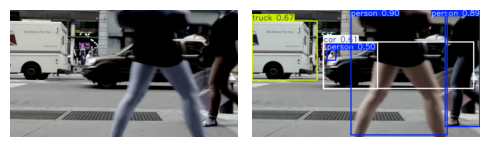

In [ ]:
cap = cv2.VideoCapture(filename);

ok, frame = cap.read()

cap.release()

results = model(frame)

for r in results:
    boxes = r.boxes          # Boxes object for bbox outputs
    masks = r.masks          # Masks object for segmentation masks outputs
    keypoints = r.keypoints  # Keypoints object for pose outputs
    probs = r.probs          # Probs object for classification outputs

for r in results:
    im_array = r.plot()
    im = PIL.Image.fromarray(im_array[..., ::-1])
    width, height = im.size
    fig_width = 5
    fig_height = (fig_width * height) / width
    fig, ax = plt.subplots(1, 2, figsize=(fig_width, fig_height))
    ax[0].imshow(frame)
    ax[0].axis('off')
    ax[1].imshow(im)
    ax[1].axis('off')
    plt.tight_layout()
    plt.show()


In [ ]:
import time

cap = cv2.VideoCapture(filename);
ok, frame = cap.read()

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

writer = cv2.VideoWriter('video_output.mp4',fourcc, fps, (width, height), True)

tbf=1/(tframes/fps);

count=0;
while ok:
      count+=1;
      display(f"Frame {int(100*count/tframes)}%", display_id="percent");
      results = model.track(frame, persist=True)
      boxes=results[0];
      annotated_frame = results[0].plot()
      writer.write(annotated_frame)
      ok, frame = cap.read()

writer.release()

cap.release()


'Frame 100%'


0: 384x640 1 person, 1 truck, 136.9ms
Speed: 3.0ms preprocess, 136.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1 car, 1 truck, 133.1ms
Speed: 3.5ms preprocess, 133.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1 car, 1 truck, 134.8ms
Speed: 6.4ms preprocess, 134.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 2 cars, 1 truck, 147.7ms
Speed: 4.8ms preprocess, 147.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 car, 1 truck, 131.5ms
Speed: 3.0ms preprocess, 131.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 car, 1 truck, 155.5ms
Speed: 3.0ms preprocess, 155.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 car, 1 truck, 134.1ms
Speed: 2.8ms preprocess, 134.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 6

In [ ]:
import time

cap = cv2.VideoCapture(filename);
ok, frame = cap.read()

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

writer = cv2.VideoWriter('video_output_track.mp4',fourcc, fps, (width, height), True)

tbf=1/(tframes/fps);

count=0;
last_centers=[];
while ok:
      count+=1;
      display(f"Frame {int(100*count/tframes)}%", display_id="percent");
      results = model.track(frame, persist=True)
      boxes=results[0];
      annotated_frame = results[0].plot(conf=False, pil=False, labels=False, boxes=False, )

      for centers in last_centers:
          for c in centers:
              annotated_frame = cv2.circle(annotated_frame, c, 2, (255,0,0), 1)

      centers=[];
      for box in results[0].boxes:
          x, y, w, h = box.xywh[0].tolist();
          c = (int(x),int(y))
          annotated_frame = cv2.circle(annotated_frame, c, 4, (0,0,255), 2)
          centers.append(c)

      last_centers.append(centers);

      writer.write(annotated_frame)
      ok, frame = cap.read()

writer.release()

cap.release()


'Frame 100%'


0: 384x640 1 person, 1 truck, 128.9ms
Speed: 3.9ms preprocess, 128.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1 car, 1 truck, 155.6ms
Speed: 3.4ms preprocess, 155.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1 car, 1 truck, 136.8ms
Speed: 3.0ms preprocess, 136.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 2 cars, 1 truck, 126.4ms
Speed: 3.5ms preprocess, 126.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 car, 1 truck, 130.7ms
Speed: 3.7ms preprocess, 130.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 car, 1 truck, 137.6ms
Speed: 4.2ms preprocess, 137.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 car, 1 truck, 139.1ms
Speed: 3.7ms preprocess, 139.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 6